Using getNetCDFData.py
====================
This program is used for extracting data vectors from a NetCDF file, and optionally graphing them. Typically this program is used in the command-line. In the following notebook cells, sys.argv represents all arguments passed to getNetCDFData.py, which is then ran with getNetCDFData.main(). Equivalent command-line arguments are found in the section headers.


In [28]:
## Import for using getNetCDFData.py
import getNetCDFData

## Import for using sys.argv (enables command-line arguments)
import sys

## Idk if this works yet
from IPython.display import display

### Running with no arguments
------------------------------------
**Command-line:**
        
        python getNetCDFData.py
**Expected behavior:**
        
        prints the usage message

In [2]:
## argv is the array of arguments in python. getNetCDFData.py is always the 0th argument

sys.argv = ["getNetCDFData.py"]
getNetCDFData.main()

-> Usage: python getNetCDFData.py [--help] <netCDF file> <variable> <flags...>
-> Run "python getNetCDFData.py <netCDF file>" to see corresponding variables and their details.
       Optional flags:
         --help (prints useful information about getNetCDFData.py)
         --mode <vector or graph>
         --position <latitude_1> <longitude_1> <latitude_2> <longitude_2>... <latitude_n> <longitude_n>
         --altitude <altitude>
         --time <start> <end>


-1

### Running with --help flag
-------------------------------
**Command-line:**
        
        python getNetCDFData.py --help
**Expected behavior:**
        
        prints the help message, then the usage message

In [6]:
sys.argv = ["getNetCDFData.py", "--help"]
getNetCDFData.main()

-> Takes a netCDF file and a variable as an argument, and extracts a vector of data.
-> Optionally use graph mode to plot data vectors on a graph. This mode requires a variable that has Time as a dimension.
-> Use optional flags to set mode, as well as variable dimensions.
-> By default, mode=vector, latitude=0, longitude=0, altitude=0, time=1:2
-> Usage: python getNetCDFData.py [--help] <netCDF file> <variable> <flags...>
-> Run "python getNetCDFData.py <netCDF file>" to see corresponding variables and their details.
       Optional flags:
         --help (prints useful information about getNetCDFData.py)
         --mode <vector or graph>
         --position <latitude_1> <longitude_1> <latitude_2> <longitude_2>... <latitude_n> <longitude_n>
         --altitude <altitude>
         --time <start> <end>


-1

### Running with 1 argument: netCDF file
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file>
        e.g. python getNetCDFData.py diagfi1_microts.nc
**Expected behavior:**
    
        prints information about all the variables in the given netCDF file

In [49]:
## Captures stdout from this cell
%%capture output

sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc"]
getNetCDFData.main()

In [50]:
## Prints just the last 1000 characters from the last cell's stdout
print("..." + output.stdout[-1000:])

...nsions:	('Time', 'altitude', 'latitude', 'longitude')
-> Ls
	Attributes:	{'title': 'Solar longitude', 'units': 'deg'}
	Dimensions:	('Time',)
-> tauTES
	Attributes:	{'title': 'tau abs 825 cm-1', 'units': ''}
	Dimensions:	('Time', 'latitude', 'longitude')
-> mtot
	Attributes:	{'title': 'total mass of water vapor', 'units': 'kg/m2'}
	Dimensions:	('Time', 'latitude', 'longitude')
-> icetot
	Attributes:	{'title': 'total mass of water ice', 'units': 'kg/m2'}
	Dimensions:	('Time', 'latitude', 'longitude')
-> h2o_ice
	Attributes:	{'title': 'h2o_ice', 'units': 'kg/kg'}
	Dimensions:	('Time', 'altitude', 'latitude', 'longitude')
-> h2o_vap
	Attributes:	{'title': 'h2o_vap', 'units': 'kg/kg'}
	Dimensions:	('Time', 'altitude', 'latitude', 'longitude')
-> rice
	Attributes:	{'title': 'Water ice particle size', 'units': 'm'}
	Dimensions:	('Time', 'altitude', 'latitude', 'longitude')
-> h2o_ice_s
	Attributes:	{'title': 'surface h2o_ice', 'units': 'kg.m-2'}
	Dimensions:	('Time', 'latitude', 'longitude

### Running with 2 arguments: netCDF file & variable
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file> <variable>
        e.g. python getNetCDFData.py diagfi1_microts.nc tsurf
**Expected behavior:**
    
        Uses "vector mode" - prints a vector of data corresponding to this variable.
        default values are used for latitude(0), longitude(0), altitude(0), and time(1:2).

In [52]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc", "tsurf"]
getNetCDFData.main()

-----------Vector Mode-------------
Surface temperature (K):
    [196.9339  189.7807  218.76273 282.8176  261.94064 209.99358 197.11069]
Coordinates:
  * Time       (Time) float32 1.0 1.167 1.333 1.5 1.667 1.833 2.0
    latitude   float64 0.0
    longitude  float64 0.0


0

### Running in graph mode
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file> <variable> --mode graph
        e.g. python getNetCDFData.py diagfi1_microts.nc tsurf --mode graph
**Expected behavior:**
    
        Uses "graph mode" - finds a vector of data corresponding to this variable and graphs it on a matplotlib plot.
        default values are used for latitude(0), longitude(0), altitude(0), and time(1:2).

-----------Graph Mode-------------


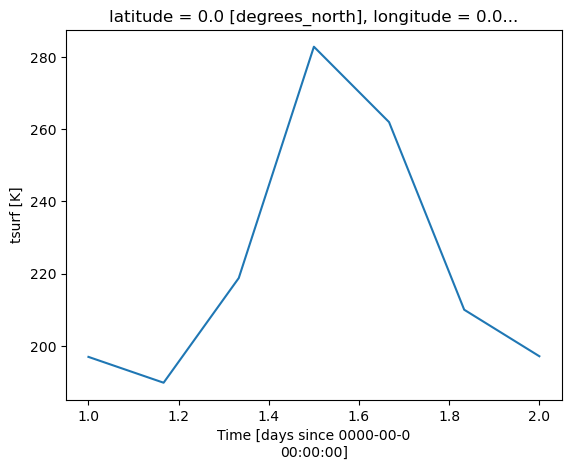

0

In [53]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc", "tsurf", "--mode", "graph"]
getNetCDFData.main()

### Running with optional flags
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file> <variable> <flags...>
        e.g. python getNetCDFData.py diagfi1_microts.nc tsurf --position 20 0 --altitude 5
**Expected behavior:**
    
        Gets arguments from optional flags and assigns them to mode, latitude, longitude, altitude, or time respectively.
        If the assignment does not exactly match any data point, it rounds to the nearest one (setting latitude to 20 actually results in latitude = 18.75).
        In this example, latitude = 20, longitude = 0, altitude = 5, and all other values are default.

In [57]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc", "tsurf", "--position", "20", "0", "--altitude", "5"]
getNetCDFData.main()

-----------Vector Mode-------------
Surface temperature (K):
    [176.12152 169.18428 216.29306 282.52646 253.8667  190.01268 176.18947]
Coordinates:
  * Time       (Time) float32 1.0 1.167 1.333 1.5 1.667 1.833 2.0
    latitude   float64 18.75
    longitude  float64 0.0


0